In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
os.getcwd()

<IPython.core.display.Javascript object>

'E:\\Complete Machine Learning'

In [4]:
os.chdir('E:\\Complete Machine Learning\\datasets\\Kaggle')

<IPython.core.display.Javascript object>

In [7]:
train=pd.read_csv('train_kfold.csv')

In [14]:
train.head(5)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [18]:
train.describe().T.style.background_gradient(subset=['50%'],cmap='PiYG')

,count,mean,std,min,25%,50%,75%,max
id,300000.000000,250018.576947,144450.150010,1.000000,124772.500000,250002.500000,375226.500000,499999.000000
cont0,300000.000000,0.527335,0.230599,-0.118039,0.405965,0.497053,0.668060,1.058443
cont1,300000.000000,0.460926,0.214003,-0.069309,0.310494,0.427903,0.615113,0.887253
cont2,300000.000000,0.490498,0.253346,-0.056104,0.300604,0.502462,0.647512,1.034704
cont3,300000.000000,0.496689,0.219199,0.130676,0.329783,0.465026,0.664451,1.039560
cont4,300000.000000,0.491654,0.240074,0.255908,0.284188,0.390470,0.696599,1.055424
cont5,300000.000000,0.510526,0.228232,0.045915,0.354141,0.488865,0.669625,1.067649
cont6,300000.000000,0.467476,0.210331,-0.224689,0.342873,0.429383,0.573383,1.111552
cont7,300000.000000,0.537119,0.218140,0.203763,0.355825,0.504661,0.703441,1.032837
cont8,300000.000000,0.498456,0.239920,-0.260275,0.332486,0.439151,0.606056,1.040229


In [12]:
train.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [18]:
## Dataset is well organized.
## No outliers detected from description.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [16]:
train.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [17]:
## Data has no null value.

In [22]:
train.drop(['id'],axis=1,inplace=True)

In [25]:
columns_to_consider=[col for col in train.columns if col not in ['target','kfold']]

In [28]:
num_feat=[feat for feat in columns_to_consider if train[feat].dtypes!='O']
cat_feat=[feat for feat in columns_to_consider if train[feat].dtypes=='O']

In [29]:
print(num_feat)
print(cat_feat)

['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


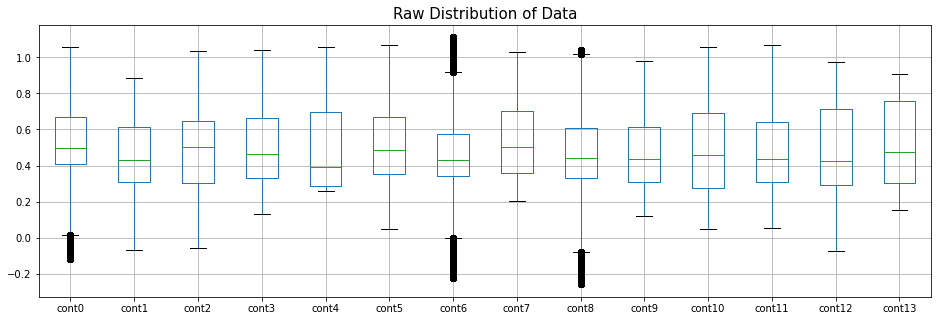

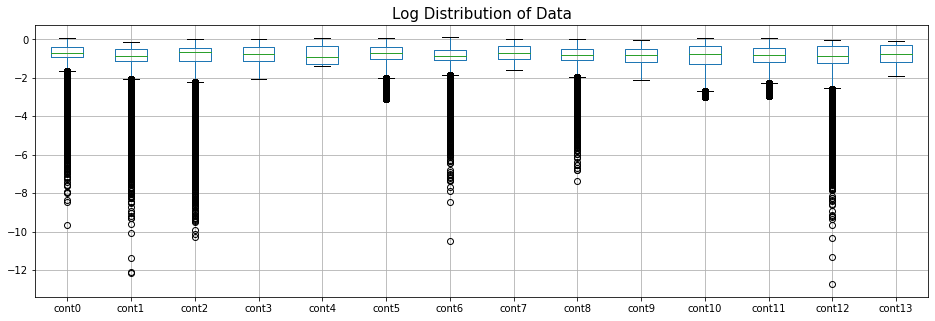

In [40]:
# Lets see how different columns are distributed.
plt.figure(figsize=(16,5))
train.iloc[:,:-1].boxplot()
plt.title('Raw Distribution of Data',fontsize=15)
plt.show()

plt.figure(figsize=(16,5))
np.log(train[num_feat].iloc[:,:-1]).boxplot()
plt.title('Log Distribution of Data',fontsize=15)
plt.show()

In [26]:
## There are few Outliers in cont0,cont6,cont8.


In [31]:
## No of unique values in each categorical columns.
cat_nunique= list(map(lambda col: train[col].nunique(),cat_feat))
d= dict(zip(cat_feat,cat_nunique))
sorted(d.items(),key= lambda x: x[1])

[('cat0', 2),
 ('cat1', 2),
 ('cat2', 2),
 ('cat3', 4),
 ('cat4', 4),
 ('cat5', 4),
 ('cat8', 7),
 ('cat6', 8),
 ('cat7', 8),
 ('cat9', 15)]

In [12]:
df=train.copy()

In [13]:
## Our target variable is target
X=df.drop('target',axis=1)
y=df['target']

In [35]:
X.shape,y.shape

((300000, 24), (300000,))

In [22]:
X.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


## Data Visualization

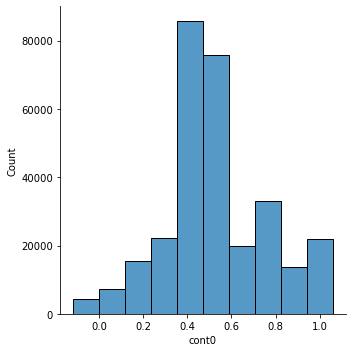

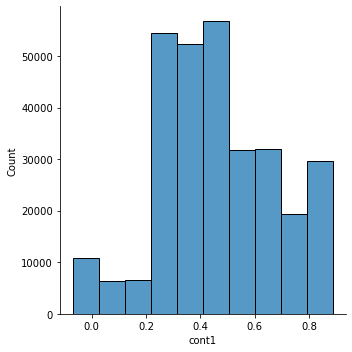

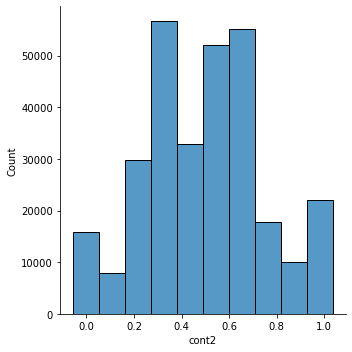

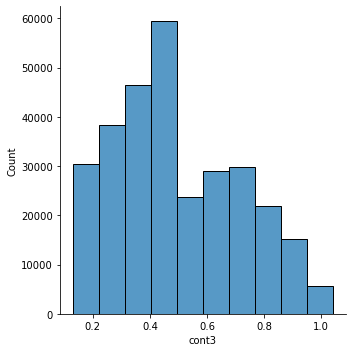

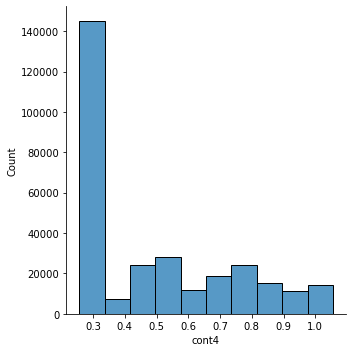

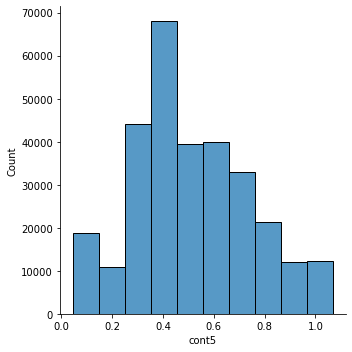

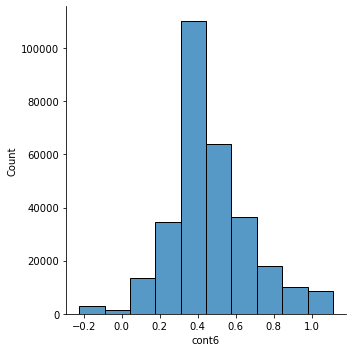

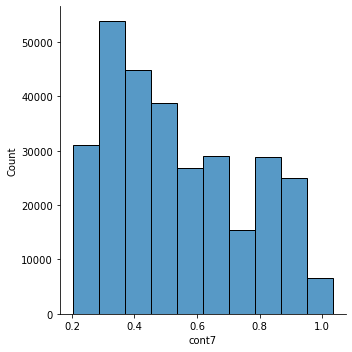

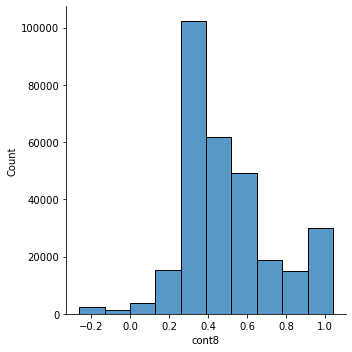

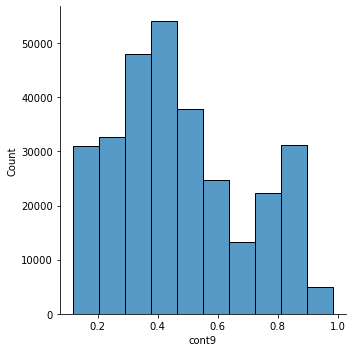

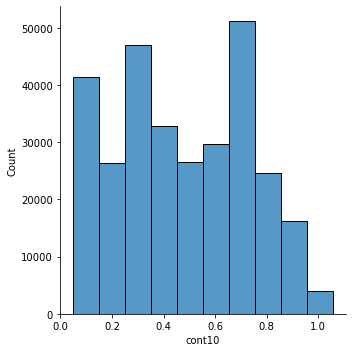

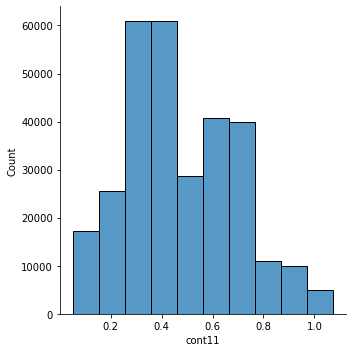

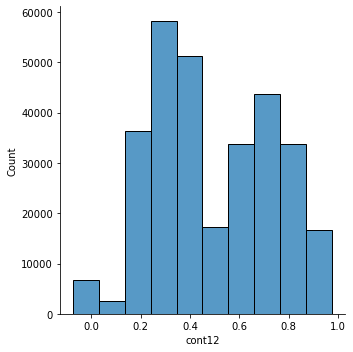

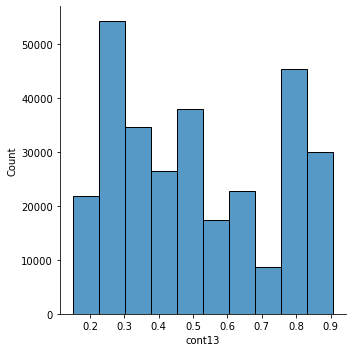

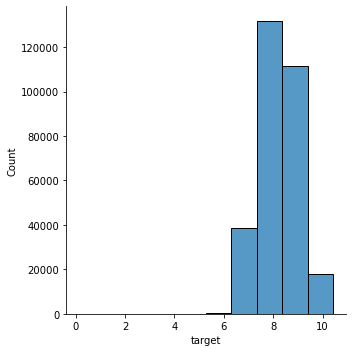

In [36]:
for feat in num_feat:
    sns.displot(data=df[feat],bins=10)
    plt.show()

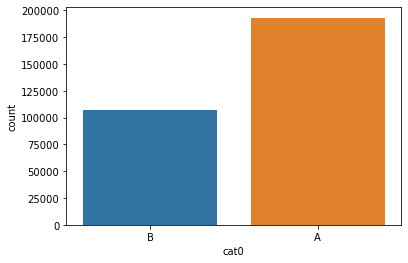

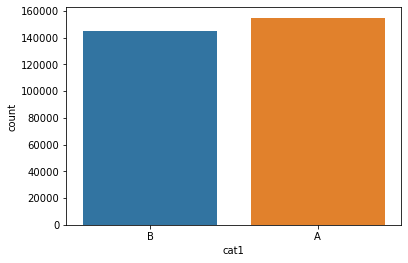

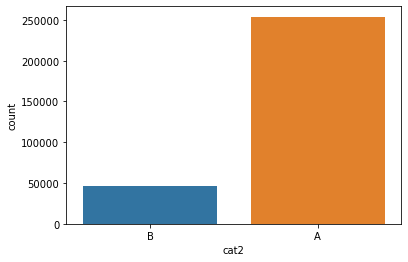

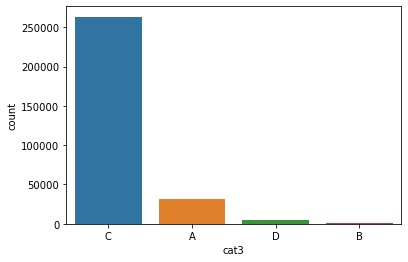

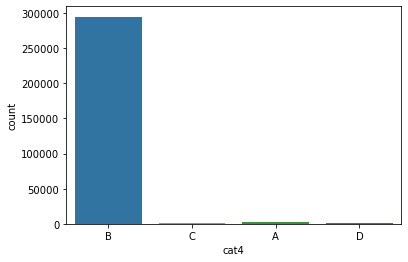

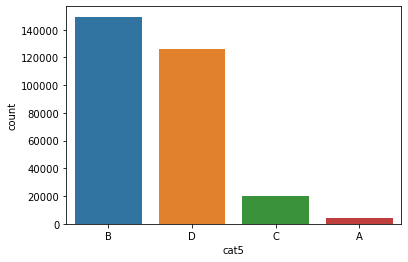

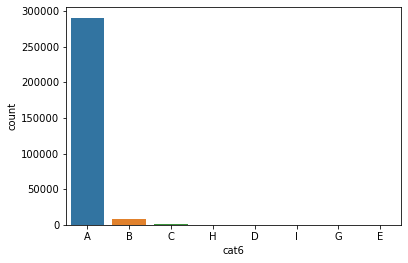

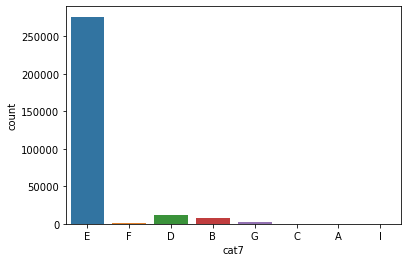

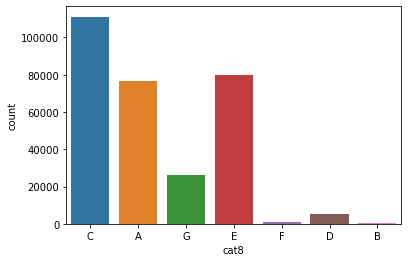

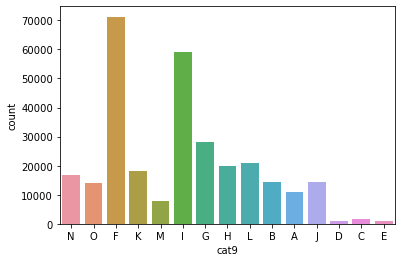

In [42]:
for feat in cat_feat:
    sns.countplot(x=feat,data=train)
    plt.show()

In [31]:
test=pd.read_csv('test.csv',index_col='id')

In [32]:
test.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [28]:

from sklearn.preprocessing import OneHotEncoder

onehot=OneHotEncoder(sparse=False)
OH_X_train=pd.DataFrame(onehot.fit_transform(X[cat_feat]))
OH_X_test=pd.DataFrame(onehot.transform(test[cat_feat]))

OH_X_train.index=train.index
OH_X_test.index=test.index

num_train=X.drop(cat_feat,axis=1)
num_test=test.drop(cat_feat,axis=1)

X_train=pd.concat([OH_X_train,num_train],axis=1)
X_test=pd.concat([OH_X_test,num_test],axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [32]:
X_train

array([[-1.34430237,  1.34430237, -1.03269418, ..., -0.42943466,
        -0.69618176,  1.62179051],
       [-1.34430237,  1.34430237, -1.03269418, ...,  2.0200075 ,
        -0.94053204, -0.1937198 ],
       [ 0.74388026, -0.74388026,  0.96834089, ...,  0.66169147,
         0.18970707,  1.14632747],
       ...,
       [-1.34430237,  1.34430237, -1.03269418, ...,  0.70439147,
         0.88793636, -1.17758012],
       [ 0.74388026, -0.74388026, -1.03269418, ...,  0.62135083,
        -0.46223664, -0.79050279],
       [ 0.74388026, -0.74388026,  0.96834089, ...,  0.05033509,
         0.58713669,  0.81204141]])

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X_train)

In [13]:
from sklearn.decomposition import PCA
pca=PCA(0.99)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
pca.n_components_

42

In [14]:
X_train_pca

array([[-1.25199378,  1.07759689, -0.24664024, ...,  0.01235709,
        -0.00842564, -0.00960921],
       [ 0.71558417,  1.14057559,  0.78809549, ..., -0.04171575,
        -0.01218514,  0.24990891],
       [ 1.56503342, -0.66097829,  0.28261602, ...,  0.00308234,
        -0.01116121, -0.08415062],
       ...,
       [ 0.17948934,  1.12664635,  0.48440587, ...,  0.04605028,
        -0.08048436, -0.00623346],
       [-1.09306417, -0.26573886,  0.41626223, ...,  0.00418508,
        -0.00674766, -0.00583537],
       [ 1.30301193, -0.68097041,  0.1565345 , ..., -0.01886609,
        -0.01720768,  0.00685933]])

In [15]:
X_train_reconstructed=pca.inverse_transform(X_train_pca)
X_test_reconstructed=pca.inverse_transform(X_test_pca)

In [26]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [65]:
X_train.shape,y.shape

((300000, 70), (300000,))

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
ran=RandomForestRegressor()
params=[
    {'n_estimators':[50,100,150],'max_depth':[5,8,10,13]}
]
grid_search =GridSearchCV(ran,params,cv=3,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 8, 10, 13],
                          'n_estimators': [50, 100, 150]}],
             scoring='neg_mean_squared_error')

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=13, n_estimators=150)

In [70]:
grid_search.best_estimator_.feature_importances_

array([1.81009197e-03, 1.80234433e-03, 6.79959124e-03, 7.37316368e-03,
       1.61922002e-03, 1.51454681e-03, 2.01367007e-03, 6.17174859e-04,
       2.14699814e-03, 1.43603870e-03, 6.84111012e-04, 9.44187117e-04,
       7.49841565e-04, 9.40158705e-04, 1.78791476e-03, 2.13211793e-03,
       2.31573250e-03, 2.30595978e-03, 1.29332081e-03, 1.55152449e-03,
       6.77309083e-04, 1.76002055e-04, 8.67359340e-05, 1.19983978e-05,
       4.30167398e-04, 3.62070883e-04, 1.09261903e-04, 9.55607125e-04,
       2.05480043e-05, 1.70318463e-03, 1.38969179e-03, 3.30270346e-04,
       1.09956144e-03, 1.78791473e-06, 2.12854696e-03, 1.49917340e-04,
       1.15493332e-02, 9.17675816e-04, 2.94781799e-03, 2.93207025e-04,
       1.50691423e-03, 1.87257620e-03, 1.84607682e-03, 5.19907157e-04,
       6.19150658e-04, 8.07554653e-04, 2.90092670e-03, 2.17714648e-03,
       2.07806122e-03, 2.93777192e-03, 1.78046285e-03, 2.34732308e-03,
       2.11338441e-03, 1.65333056e-03, 1.91362350e-03, 1.88930619e-03,
      

In [71]:
model=RandomForestRegressor(n_estimators=150)
y_pred=model.fit(X_train,y).predict(X_test)
submission=pd.read_csv('sample_submission.csv',index_col='id')
submission['target']=y_pred

## CATBoost

In [5]:
pip install catboost

You should consider upgrading via the 'C:\Users\Manan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
train.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [10]:
X=train.drop('target',axis=1)
y=train['target']

In [9]:
from catboost import CatBoostRegressor

In [17]:

model=CatBoostRegressor(iterations=100,learning_rate=0.1)
model.fit(X,y,cat_features=cat_feat,plot=False)

0:	learn: 0.7453999	total: 282ms	remaining: 28s
1:	learn: 0.7444073	total: 567ms	remaining: 27.8s
2:	learn: 0.7435479	total: 779ms	remaining: 25.2s
3:	learn: 0.7427319	total: 983ms	remaining: 23.6s
4:	learn: 0.7420456	total: 1.18s	remaining: 22.5s
5:	learn: 0.7414460	total: 1.41s	remaining: 22s
6:	learn: 0.7409165	total: 1.63s	remaining: 21.7s
7:	learn: 0.7403631	total: 1.91s	remaining: 22s
8:	learn: 0.7398245	total: 2.14s	remaining: 21.6s
9:	learn: 0.7394087	total: 2.36s	remaining: 21.3s
10:	learn: 0.7390321	total: 2.58s	remaining: 20.9s
11:	learn: 0.7386395	total: 2.8s	remaining: 20.6s
12:	learn: 0.7383043	total: 3.01s	remaining: 20.2s
13:	learn: 0.7379654	total: 3.24s	remaining: 19.9s
14:	learn: 0.7376893	total: 3.46s	remaining: 19.6s
15:	learn: 0.7374085	total: 3.68s	remaining: 19.3s
16:	learn: 0.7371198	total: 3.9s	remaining: 19s
17:	learn: 0.7367699	total: 4.11s	remaining: 18.7s
18:	learn: 0.7365149	total: 4.33s	remaining: 18.4s
19:	learn: 0.7362834	total: 4.53s	remaining: 18.1s


In [18]:
y_pred=model.predict(test)

In [24]:
!pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=9880f6349c74d728a4954faca616f0016d94907ceef98268fdadb0c0ab402412
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


You should consider upgrading via the 'c:\users\manan\anaconda3\python.exe -m pip install --upgrade pip' command.


### LGBMRegressor

In [21]:
from lightgbm import LGBMRegressor

In [15]:
X_train=X.copy()
X_test=test.copy()
y_train=y.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_feat:
    le.fit(X_train[col])
le_dict= dict(zip(le.classes_,le.transform(le.classes_)))
le_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14}

In [19]:
X_train.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,2,1,1,0,4,2,13,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,1,1,0,0,1,3,0,5,0,14,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,0,0,0,2,1,3,0,3,0,5,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,1,1,0,2,1,3,0,4,2,10,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,0,0,0,2,1,3,0,4,0,13,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [18]:
for col in cat_feat:
    X_train[col]=X_train[col].apply(lambda x: le_dict.get(x,'<unknown_value>'))

In [22]:
X_test.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,2,1,1,0,4,4,8,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,0,1,0,2,1,2,0,4,2,7,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,1,0,0,0,1,1,0,4,3,10,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,1,1,0,2,1,3,0,4,0,13,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,1,1,0,2,1,2,0,4,2,5,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [21]:
for col in cat_feat:
    X_test[col]=X_test[col].apply(lambda x: le_dict.get(x,'<unknown_value>'))

In [187]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [18]:
X_train_reconstructed.shape,y_train.shape

((300000, 70), (300000,))

In [22]:

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def objective(trial,data=X_train_reconstructed,target=y_train):
    train_x,test_x,train_y,test_y= train_test_split(X_train_reconstructed,y_train,test_size=0.2,random_state=42)
    params={
        'metric':'rmse',
        'random_state':42,
        'reg_alpha':trial.suggest_loguniform('reg_alpha',1e-3,10.0),
        'reg_lambda':trial.suggest_loguniform('reg_lambda',1e-3,10.0),
        'colsample_bytree':trial.suggest_categorical('colsample_bytree',[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample':trial.suggest_categorical('subsample',[0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'learning_rate':trial.suggest_categorical('learning_rate',[0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth':trial.suggest_categorical('max_depth',[10,20,100]),
        'num_leaves':trial.suggest_int('num_leaves',1,1000),
        'min_child_samples':trial.suggest_int('min_child_samples',1,300),
        'cat_smooth':trial.suggest_int('min_data_per_groups',1,100)
    }
    model= LGBMRegressor(**params)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    y_preds=model.predict(test_x)
    
    rmse=mean_squared_error(test_y,y_preds,squared=False)
    
    return rmse
    
    

In [163]:


""""

def objective(trial,data=X_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse
    
    """

In [23]:

study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=50)
print('number of finished trials:',len(study.trials))
print('Best trial:',study.best_trial.params)



[I 2021-08-20 11:38:55,273] A new study created in memory with name: no-name-43a30fee-e5f9-47a3-8a1d-f4bb57f1a04a


<IPython.core.display.Javascript object>

[I 2021-08-20 11:39:07,930] Trial 0 finished with value: 0.733052551337713 and parameters: {'reg_alpha': 0.039734911752833266, 'reg_lambda': 9.975679365891237, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 56, 'min_child_samples': 103, 'min_data_per_groups': 19}. Best is trial 0 with value: 0.733052551337713.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:39:26,700] Trial 1 finished with value: 0.7326424409956961 and parameters: {'reg_alpha': 0.8187804197006047, 'reg_lambda': 0.36561314618496005, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 175, 'min_child_samples': 119, 'min_data_per_groups': 82}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:39:44,720] Trial 2 finished with value: 0.7361883513946582 and parameters: {'reg_alpha': 0.0014859827636196068, 'reg_lambda': 0.002124149331059285, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 734, 'min_child_samples': 289, 'min_data_per_groups': 77}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:39:59,813] Trial 3 finished with value: 0.7381914729872248 and parameters: {'reg_alpha': 0.01571824673177522, 'reg_lambda': 0.06869551042307957, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 56, 'min_child_samples': 272, 'min_data_per_groups': 89}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:40:22,019] Trial 4 finished with value: 0.738932485238548 and parameters: {'reg_alpha': 0.0016600272805144204, 'reg_lambda': 0.39903875514708415, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 10, 'num_leaves': 358, 'min_child_samples': 99, 'min_data_per_groups': 18}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:41:04,297] Trial 5 finished with value: 0.7376111485345159 and parameters: {'reg_alpha': 2.2724621687316704, 'reg_lambda': 0.037451238558832825, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 543, 'min_child_samples': 165, 'min_data_per_groups': 19}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:41:33,322] Trial 6 finished with value: 0.7330981290132031 and parameters: {'reg_alpha': 0.037207429693649256, 'reg_lambda': 0.07290250499194625, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 620, 'min_child_samples': 168, 'min_data_per_groups': 23}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:42:35,757] Trial 7 finished with value: 0.7363962487748058 and parameters: {'reg_alpha': 3.4415753719887068, 'reg_lambda': 0.291929583936, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 20, 'num_leaves': 915, 'min_child_samples': 37, 'min_data_per_groups': 18}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:42:50,936] Trial 8 finished with value: 0.7397561459427626 and parameters: {'reg_alpha': 0.02922728157267559, 'reg_lambda': 0.18141317102583132, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 20, 'num_leaves': 48, 'min_child_samples': 237, 'min_data_per_groups': 39}. Best is trial 1 with value: 0.7326424409956961.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:43:50,693] Trial 9 finished with value: 0.7321818497907453 and parameters: {'reg_alpha': 0.0012387324069337141, 'reg_lambda': 8.375891693533465, 'colsample_bytree': 0.8, 'subsample': 0.9, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 849, 'min_child_samples': 89, 'min_data_per_groups': 90}. Best is trial 9 with value: 0.7321818497907453.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:44:12,828] Trial 10 finished with value: 0.7349605163424996 and parameters: {'reg_alpha': 0.22003968236417648, 'reg_lambda': 5.574827186475794, 'colsample_bytree': 0.3, 'subsample': 0.9, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 999, 'min_child_samples': 23, 'min_data_per_groups': 64}. Best is trial 9 with value: 0.7321818497907453.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:44:48,051] Trial 11 finished with value: 0.7314090568306014 and parameters: {'reg_alpha': 0.5706046931525902, 'reg_lambda': 1.438271255428286, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 322, 'min_child_samples': 95, 'min_data_per_groups': 99}. Best is trial 11 with value: 0.7314090568306014.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:45:22,751] Trial 12 finished with value: 0.7314905816619047 and parameters: {'reg_alpha': 0.35032818847335634, 'reg_lambda': 1.2423267557707225, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 330, 'min_child_samples': 62, 'min_data_per_groups': 100}. Best is trial 11 with value: 0.7314090568306014.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:46:06,564] Trial 13 finished with value: 0.7314495366279902 and parameters: {'reg_alpha': 0.40309025594213793, 'reg_lambda': 1.5751940289276871, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 349, 'min_child_samples': 59, 'min_data_per_groups': 100}. Best is trial 11 with value: 0.7314090568306014.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:46:43,271] Trial 14 finished with value: 0.7317043074632943 and parameters: {'reg_alpha': 8.375511776807068, 'reg_lambda': 2.344800309146188, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 365, 'min_child_samples': 194, 'min_data_per_groups': 63}. Best is trial 11 with value: 0.7314090568306014.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:47:16,849] Trial 15 finished with value: 0.731881785401084 and parameters: {'reg_alpha': 0.8675692024529394, 'reg_lambda': 0.013361080341560755, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 235, 'min_child_samples': 7, 'min_data_per_groups': 100}. Best is trial 11 with value: 0.7314090568306014.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:48:07,113] Trial 16 finished with value: 0.7311010512657234 and parameters: {'reg_alpha': 0.10656963668804785, 'reg_lambda': 1.4673011402074705, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 458, 'min_child_samples': 63, 'min_data_per_groups': 69}. Best is trial 16 with value: 0.7311010512657234.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:48:56,437] Trial 17 finished with value: 0.7345330971019213 and parameters: {'reg_alpha': 0.11949416912957915, 'reg_lambda': 0.666575931806854, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 458, 'min_child_samples': 123, 'min_data_per_groups': 47}. Best is trial 16 with value: 0.7311010512657234.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:49:53,481] Trial 18 finished with value: 0.7299578252342258 and parameters: {'reg_alpha': 0.080156898324699, 'reg_lambda': 3.087669901191169, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 605, 'min_child_samples': 63, 'min_data_per_groups': 3}. Best is trial 18 with value: 0.7299578252342258.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:50:51,256] Trial 19 finished with value: 0.7299500229679784 and parameters: {'reg_alpha': 0.005889095933883256, 'reg_lambda': 3.3775636737242487, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 669, 'min_child_samples': 70, 'min_data_per_groups': 3}. Best is trial 19 with value: 0.7299500229679784.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:51:44,687] Trial 20 finished with value: 0.7298256765172035 and parameters: {'reg_alpha': 0.004399942213545514, 'reg_lambda': 4.3898341860623615, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 668, 'min_child_samples': 140, 'min_data_per_groups': 2}. Best is trial 20 with value: 0.7298256765172035.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:52:40,271] Trial 21 finished with value: 0.729581421654981 and parameters: {'reg_alpha': 0.007512013240144467, 'reg_lambda': 3.764005663174591, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 704, 'min_child_samples': 139, 'min_data_per_groups': 1}. Best is trial 21 with value: 0.729581421654981.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:53:32,390] Trial 22 finished with value: 0.7297511051524108 and parameters: {'reg_alpha': 0.00786520571034214, 'reg_lambda': 3.797597404033318, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 728, 'min_child_samples': 208, 'min_data_per_groups': 4}. Best is trial 21 with value: 0.729581421654981.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:54:26,063] Trial 23 finished with value: 0.7295523280917255 and parameters: {'reg_alpha': 0.006215051192780176, 'reg_lambda': 4.230314059597249, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 777, 'min_child_samples': 209, 'min_data_per_groups': 9}. Best is trial 23 with value: 0.7295523280917255.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:55:18,028] Trial 24 finished with value: 0.7295452628029856 and parameters: {'reg_alpha': 0.007958423049589564, 'reg_lambda': 0.0010381243656063838, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 788, 'min_child_samples': 219, 'min_data_per_groups': 31}. Best is trial 24 with value: 0.7295452628029856.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:56:07,807] Trial 25 finished with value: 0.7294654014387576 and parameters: {'reg_alpha': 0.0028270967722625016, 'reg_lambda': 0.0016991431572898176, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 814, 'min_child_samples': 234, 'min_data_per_groups': 30}. Best is trial 25 with value: 0.7294654014387576.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:56:58,053] Trial 26 finished with value: 0.729427331491376 and parameters: {'reg_alpha': 0.0024934665702665126, 'reg_lambda': 0.001247271667106344, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 798, 'min_child_samples': 244, 'min_data_per_groups': 33}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:57:37,160] Trial 27 finished with value: 0.7299803236157536 and parameters: {'reg_alpha': 0.00284739680478404, 'reg_lambda': 0.0010042375240307422, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 849, 'min_child_samples': 244, 'min_data_per_groups': 33}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:58:01,221] Trial 28 finished with value: 0.7314766741935784 and parameters: {'reg_alpha': 0.01596798228741097, 'reg_lambda': 0.005180819624982077, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 969, 'min_child_samples': 254, 'min_data_per_groups': 32}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:58:51,909] Trial 29 finished with value: 0.7294857141226346 and parameters: {'reg_alpha': 0.00271185480784864, 'reg_lambda': 0.003787890556165362, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 842, 'min_child_samples': 229, 'min_data_per_groups': 51}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 11:59:35,977] Trial 30 finished with value: 0.729714923066929 and parameters: {'reg_alpha': 0.0026506149338838083, 'reg_lambda': 0.005722033950638836, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 893, 'min_child_samples': 297, 'min_data_per_groups': 48}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:00:26,869] Trial 31 finished with value: 0.7294629612940698 and parameters: {'reg_alpha': 0.0028083168825001033, 'reg_lambda': 0.0010579685934506535, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 805, 'min_child_samples': 225, 'min_data_per_groups': 40}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:01:15,291] Trial 32 finished with value: 0.729518972765166 and parameters: {'reg_alpha': 0.0026715058837029067, 'reg_lambda': 0.0033588363765003596, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 819, 'min_child_samples': 258, 'min_data_per_groups': 42}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:02:14,896] Trial 33 finished with value: 0.7295762640549586 and parameters: {'reg_alpha': 0.0010484204364680618, 'reg_lambda': 0.0024986667038511493, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 895, 'min_child_samples': 186, 'min_data_per_groups': 57}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:02:35,745] Trial 34 finished with value: 0.7358228593377977 and parameters: {'reg_alpha': 0.014625473588082218, 'reg_lambda': 0.016428010045052087, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 773, 'min_child_samples': 273, 'min_data_per_groups': 54}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:03:05,308] Trial 35 finished with value: 0.7368914446393068 and parameters: {'reg_alpha': 0.0021343030408620223, 'reg_lambda': 0.001733583747642306, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 945, 'min_child_samples': 233, 'min_data_per_groups': 39}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:03:49,164] Trial 36 finished with value: 0.7296779801709585 and parameters: {'reg_alpha': 0.004130531495865981, 'reg_lambda': 0.006713567678333308, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 543, 'min_child_samples': 276, 'min_data_per_groups': 26}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:04:20,810] Trial 37 finished with value: 0.7305127329935874 and parameters: {'reg_alpha': 0.017968772191332288, 'reg_lambda': 0.0016527747007384608, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 866, 'min_child_samples': 226, 'min_data_per_groups': 43}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:04:52,344] Trial 38 finished with value: 0.7383185863933407 and parameters: {'reg_alpha': 0.0010145156804749053, 'reg_lambda': 0.012369532009217069, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 611, 'min_child_samples': 196, 'min_data_per_groups': 26}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:05:31,771] Trial 39 finished with value: 0.7361216426175966 and parameters: {'reg_alpha': 0.0016228634404037623, 'reg_lambda': 0.027414078525499905, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 738, 'min_child_samples': 173, 'min_data_per_groups': 13}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:05:58,988] Trial 40 finished with value: 0.7354765300479205 and parameters: {'reg_alpha': 0.01112768039586025, 'reg_lambda': 0.0034044775552296075, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 811, 'min_child_samples': 256, 'min_data_per_groups': 36}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:06:46,676] Trial 41 finished with value: 0.7294627063649731 and parameters: {'reg_alpha': 0.0033424462010246945, 'reg_lambda': 0.002966051571714936, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 825, 'min_child_samples': 260, 'min_data_per_groups': 41}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:07:31,984] Trial 42 finished with value: 0.7294968933118049 and parameters: {'reg_alpha': 0.00424530274925028, 'reg_lambda': 0.0015431793796321623, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 923, 'min_child_samples': 283, 'min_data_per_groups': 52}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:08:18,078] Trial 43 finished with value: 0.7295376340469062 and parameters: {'reg_alpha': 0.001829064043843551, 'reg_lambda': 0.0032314228435430695, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 676, 'min_child_samples': 245, 'min_data_per_groups': 45}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:08:33,674] Trial 44 finished with value: 0.7347983472962822 and parameters: {'reg_alpha': 0.003336713486641286, 'reg_lambda': 0.0098664110650239, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 843, 'min_child_samples': 216, 'min_data_per_groups': 59}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:09:19,815] Trial 45 finished with value: 0.7295465090842521 and parameters: {'reg_alpha': 0.022973387579503023, 'reg_lambda': 0.0024630478381832323, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 750, 'min_child_samples': 260, 'min_data_per_groups': 28}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:09:56,322] Trial 46 finished with value: 0.7376782346993466 and parameters: {'reg_alpha': 0.0017812472951319002, 'reg_lambda': 0.0013036319627290139, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 1000, 'min_child_samples': 298, 'min_data_per_groups': 36}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:10:46,372] Trial 47 finished with value: 0.7294730054341563 and parameters: {'reg_alpha': 0.011233953013334888, 'reg_lambda': 0.004520744762851809, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 881, 'min_child_samples': 233, 'min_data_per_groups': 20}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:11:18,832] Trial 48 finished with value: 0.7326190984834818 and parameters: {'reg_alpha': 0.010657741471737946, 'reg_lambda': 0.008106761357559205, 'colsample_bytree': 0.9, 'subsample': 0.9, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 952, 'min_child_samples': 264, 'min_data_per_groups': 20}. Best is trial 26 with value: 0.729427331491376.


<IPython.core.display.Javascript object>

[I 2021-08-20 12:12:12,846] Trial 49 finished with value: 0.7353595748702516 and parameters: {'reg_alpha': 0.03379615644473826, 'reg_lambda': 0.022551802771230898, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 885, 'min_child_samples': 179, 'min_data_per_groups': 15}. Best is trial 26 with value: 0.729427331491376.


number of finished trials: 50
Best trial: {'reg_alpha': 0.0024934665702665126, 'reg_lambda': 0.001247271667106344, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 798, 'min_child_samples': 244, 'min_data_per_groups': 33}


In [165]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,0.723351,2021-08-18 14:36:35.819690,2021-08-18 14:38:17.487478,0 days 00:01:41.667788,0.210313,0.9,0.247248,0.020,15,81,24,0.6,COMPLETE
1,1,0.721256,2021-08-18 14:38:17.487478,2021-08-18 14:40:11.180872,0 days 00:01:53.693394,0.034017,0.7,0.308782,0.018,13,276,24,0.8,COMPLETE
2,2,0.722103,2021-08-18 14:40:11.188878,2021-08-18 14:43:41.668000,0 days 00:03:30.479122,0.002766,0.9,0.783375,0.008,15,106,48,0.4,COMPLETE
3,3,0.720108,2021-08-18 14:43:41.683631,2021-08-18 14:47:52.231384,0 days 00:04:10.547753,0.835604,1.0,0.005694,0.009,7,299,48,0.4,COMPLETE
4,4,0.722329,2021-08-18 14:47:52.232366,2021-08-18 14:50:02.654198,0 days 00:02:10.421832,0.627865,0.7,0.001597,0.018,9,5,24,0.4,COMPLETE
5,5,0.720798,2021-08-18 14:50:02.654198,2021-08-18 14:53:38.424307,0 days 00:03:35.770109,0.024296,0.4,0.009045,0.009,20,279,24,1.0,COMPLETE
6,6,0.725053,2021-08-18 14:53:38.424307,2021-08-18 14:57:01.333694,0 days 00:03:22.909387,0.478301,0.7,0.022959,0.014,20,49,24,1.0,COMPLETE
7,7,0.720710,2021-08-18 14:57:01.341735,2021-08-18 15:00:57.356765,0 days 00:03:56.015030,2.261671,0.9,0.219821,0.008,5,236,48,0.6,COMPLETE
8,8,0.722506,2021-08-18 15:00:57.364773,2021-08-18 15:03:37.786284,0 days 00:02:40.421511,1.952240,0.7,0.001307,0.012,17,114,24,0.6,COMPLETE
9,9,0.721923,2021-08-18 15:03:37.794279,2021-08-18 15:06:13.961432,0 days 00:02:36.167153,0.240505,0.6,0.015272,0.012,11,31,48,0.5,COMPLETE


In [174]:
params=study.best_params   
params['tree_method']='hist'
params['n_estimators']=4000

In [175]:
params

{'lambda': 0.032629267738566316,
 'alpha': 0.0800238045532207,
 'colsample_bytree': 0.4,
 'subsample': 0.5,
 'learning_rate': 0.02,
 'max_depth': 5,
 'random_state': 48,
 'min_child_weight': 276,
 'tree_method': 'hist',
 'n_estimators': 4000}

In [176]:
""""
columns=cat_feat+num_feat
preds=np.zeros(X_test.shape[0])
kf=KFold(n_splits=5,random_state=42,shuffle=True)
rmse=[]
n=0
for trn_idx,test_idx in kf.split(X_train[columns],y_train):
    X_tr,X_vl=X_train[columns].iloc[trn_idx],X_train.iloc[test_idx]
    y_tr,y_vl=y_train.iloc[trn_idx],y_train.iloc[test_idx]
    model = xgb.XGBRegressor(**params)
    model.fit(X_tr,y_tr,eval_set=[(X_vl,y_vl)],early_stopping_rounds=100,verbose=False)
    preds+=model.predict(X_test[columns])/kf.n_splits
    rmse.append(mean_squared_error(y_vl, model.predict(X_vl), squared=False))
    print(n+1,rmse[n])
    n+=1
    """

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 0.7181724839308349


<IPython.core.display.Javascript object>

2 0.7180344272867432


<IPython.core.display.Javascript object>

3 0.7201600505815681


<IPython.core.display.Javascript object>

4 0.7203048117952704


<IPython.core.display.Javascript object>

5 0.7188820769391631


In [192]:
cat_feat

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

In [198]:
def objective(trial,data=X_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(X_train, y_train, test_size=0.15,random_state=42)
    param = {
        'loss_function': 'RMSE',
        'task_type': 'CPU',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        #'rsm': trial.suggest_uniform('rsm', 0.3, 1.0),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
        'n_estimators':  4000,
        'max_depth': trial.suggest_categorical('max_depth', [7,10,14,16]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }
    model = CatBoostRegressor(**param)  
    
    model.fit(train_x,train_y,cat_features=cat_feat,eval_set=[(test_x,test_y)],early_stopping_rounds=200,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [1]:
#study = optuna.create_study(direction='minimize')
#study.optimize(objective, n_trials=50)
#print('Number of finished trials:', len(study.trials))
#print('Best trial:', study.best_trial.params)

In [5]:
train['kfold']=-1

In [9]:
train.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,-1
2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,-1
3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,-1
4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,-1
6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,-1


In [15]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=2)
for fold, (train_indices,val_indices) in enumerate(kf.split(X=train)):
    train.loc[val_indices,'kfold']=fold

In [16]:
train.to_csv('train_kfold.csv',index=False)

In [30]:
train.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,0.0
1,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,3.0
2,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4.0
3,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,3.0
4,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,2.0


In [39]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [42]:
final_pred=[]
for fold in range(5):
    x_train=train[train.kfold!=fold].reset_index(drop=True)
    x_valid=train[train.kfold==fold].reset_index(drop=True)
    
    y_train=x_train.target
    y_valid=x_valid.target
    X_test=test.copy()
    
    
    x_train=x_train[columns_to_consider]
    x_valid=x_valid[columns_to_consider]
    x_test=test.copy()
    
    ordinal=OrdinalEncoder()
    x_train[cat_feat]=ordinal.fit_transform(x_train[cat_feat])
    x_valid[cat_feat]=ordinal.transform(x_valid[cat_feat])
    x_test[cat_feat]=ordinal.transform(x_test[cat_feat])
    
    model=XGBRegressor(random_state=fold,
                      n_jobs=-1,
                      n_estimators=5000,
                      tree_method='hist',
                      learning_rate=0.01,
                      subsample=0.9,
                      max_depth=9,
                      colsample_bytree=0.5,
                      reg_alpha=30,
                      eval_metric='rmse'
                       )
    model.fit(x_train,y_train)
    preds_valid=model.predict(x_valid)
    preds_test=model.predict(x_test)
    final_pred.append(preds_test)
    print(fold,mean_squared_error(y_valid,preds_valid,squared=False))

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [8]:
df = pd.read_csv("train_kfold.csv")
df_test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [10]:
useful_features = [c for c in df.columns if c not in ("id", "target", "kfold")]
object_cols = [col for col in useful_features if col.startswith("cat")]
df_test = df_test[useful_features]

In [11]:
final_predictions = []
scores = []
for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()

    ytrain = xtrain.target
    yvalid = xvalid.target
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    ordinal_encoder = preprocessing.OrdinalEncoder()
    xtrain[object_cols] = ordinal_encoder.fit_transform(xtrain[object_cols])
    xvalid[object_cols] = ordinal_encoder.transform(xvalid[object_cols])
    xtest[object_cols] = ordinal_encoder.transform(xtest[object_cols])
    
    params = {'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 'reg_alpha': 14.68267919457715, 'subsample': 0.8031450486786944, 'colsample_bytree': 0.170759104940733, 'max_depth': 3}
    
    model = XGBRegressor(
        random_state=0, 
        #tree_method='gpu_hist',
        #gpu_id=0,
        #predictor="gpu_predictor",
        n_estimators=5000,
        **params
    )
    model.fit(xtrain, ytrain, early_stopping_rounds=300, eval_set=[(xvalid, yvalid)], verbose=1000)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_predictions.append(test_preds)
    rmse = mean_squared_error(yvalid, preds_valid, squared=False)
    print(fold, rmse)
    scores.append(rmse)

print(np.mean(scores), np.std(scores))

[0]	validation_0-rmse:7.17448
[1000]	validation_0-rmse:0.71730
[2000]	validation_0-rmse:0.71549
[2978]	validation_0-rmse:0.71523
0 0.7151770613510307
[0]	validation_0-rmse:7.17474
[1000]	validation_0-rmse:0.71979
[2000]	validation_0-rmse:0.71809
[3000]	validation_0-rmse:0.71784
[3005]	validation_0-rmse:0.71784
1 0.7177753594443534
[0]	validation_0-rmse:7.17089
[1000]	validation_0-rmse:0.71869
[2000]	validation_0-rmse:0.71691
[3000]	validation_0-rmse:0.71672
[3040]	validation_0-rmse:0.71673
2 0.7166369053432292
[0]	validation_0-rmse:7.17439
[1000]	validation_0-rmse:0.72122
[2000]	validation_0-rmse:0.71972
[2749]	validation_0-rmse:0.71958
3 0.7195361927035168
[0]	validation_0-rmse:7.17020
[1000]	validation_0-rmse:0.71615
[2000]	validation_0-rmse:0.71438
[2867]	validation_0-rmse:0.71417
4 0.714142258790473
0.7166535555265205 0.0019002612820140429


In [12]:
preds = np.mean(np.column_stack(final_predictions), axis=1)
sample_submission.target = preds
sample_submission.to_csv("s8.csv", index=False)

In [177]:
submission=pd.read_csv('sample_submission.csv',index_col='id')
submission['target']=preds

In [178]:
submission.to_csv('s7.csv')